## Predicting Flight Delays
### Exploratory Data Analysis
Team: Ali, Khaildyn, Mobola
## Task 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

In [3]:
# Read files
df_flights = pd.read_csv("data/flights.csv")

In [4]:
df_flights.head()

,fl_date,mkt_unique_carrier,tail_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,security_delay,late_aircraft_delay,mkt_carrier_name,year,month,day_of_month,day_of_week,haul_length,route,flight_delayed
0,2018-05-04,DL,N754EV,BOS,"Boston, MA",RIC,"Richmond, VA",1455,1453.0,-2.0,...,0.0,0.0,Delta Air Lines,2018,5,4,4,short,BOS-RIC,0
1,2019-12-09,UA,N828UA,MSY,"New Orleans, LA",EWR,"Newark, NJ",1515,1757.0,162.0,...,0.0,0.0,United Airlines,2019,12,9,0,short,MSY-EWR,1
2,2019-12-20,AA,N763US,CLT,"Charlotte, NC",SAT,"San Antonio, TX",1610,1630.0,20.0,...,0.0,0.0,American Airlines,2019,12,20,4,short,CLT-SAT,1
3,2019-07-14,DL,N961DL,ATL,"Atlanta, GA",PWM,"Portland, ME",2114,2114.0,0.0,...,0.0,0.0,Delta Air Lines,2019,7,14,6,short,ATL-PWM,0
4,2019-04-08,AA,N679AW,PHX,"Phoenix, AZ",BOI,"Boise, ID",2021,2015.0,-6.0,...,0.0,0.0,American Airlines,2019,4,8,0,short,PHX-BOI,0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.


Text(0.5, 1.0, 'Arrival Delays without Outlier Treatment')

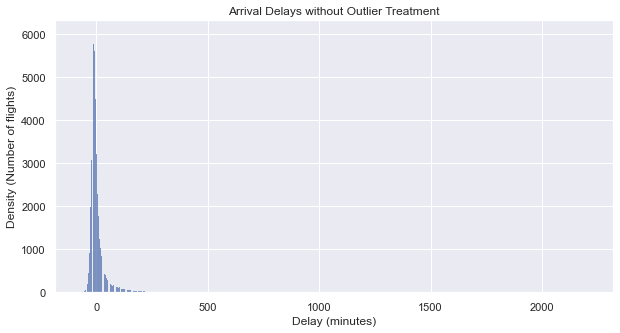

In [47]:
# Arrival Delays without Outlier Treatment
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')

sns.histplot(df_flights, x="arr_delay").set_title("Arrival Delays without Outlier Treatment", size=12)

![arr_delay](img/arr_delay.png)

## Outlier Treatment using Z Score

In [15]:
from scipy import stats
task1_df = df_flights.copy()
arr_delay_df = task1_df.arr_delay[(np.abs(stats.zscore(task1_df.arr_delay)) < 3)]
task1_df['arr_delay_zscore'] = arr_delay_df
task1_df['arr_delay_zscore'] = task1_df['arr_delay_zscore'].fillna(0)

Text(0.5, 1.0, 'Arrival Delays after Z-Score Outlier Treatment')

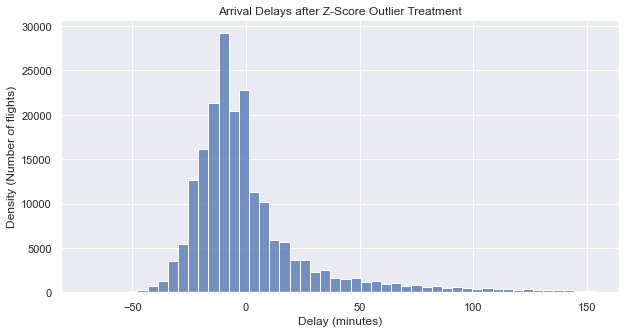

In [41]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(task1_df.arr_delay_zscore, bins=50).set_title("Arrival Delays after Z-Score Outlier Treatment", size=12)

## Outlier Treatment using IQR

In [21]:
Q1_arr = df_flights.arr_delay.quantile(0.25)
Q3_arr = df_flights.arr_delay.quantile(0.75)
IQR_arr = Q3_arr - Q1_arr
flights_no_outlier_iqr = df_flights.loc[(df_flights['arr_delay'] >= (Q1_arr - 1.5*IQR_arr))\
                                     & (df_flights['arr_delay'] <= Q3_arr + 1.5*IQR_arr)]

Text(0.5, 1.0, 'Arrival Delays after IQR Outlier Treatment')

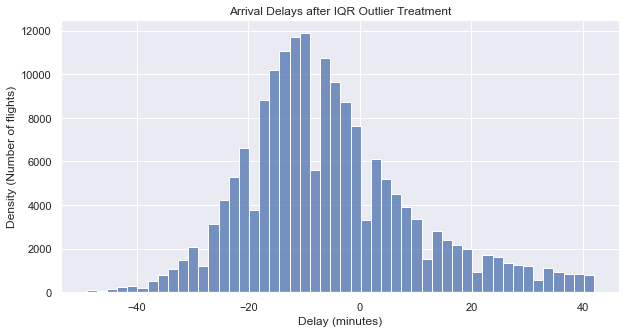

In [45]:
fig, ax = plt.subplots(figsize = (10,5))
ax.set_ylabel('Density (Number of flights)')
ax.set_xlabel('Delay (minutes)')
sns.histplot(flights_no_outlier_iqr, x="arr_delay", bins=50).set_title("Arrival Delays after IQR Outlier Treatment", size=12)